In [ ]:
# Library yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm as tq

In [ ]:
# Libraries untuk pemrosesan data gambar
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

In [ ]:
# Libraries untuk pembangunan model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Mencetak versi TensorFlow yang sedang digunakan
print(tf.__version__)

2.18.0


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mordun","key":"b49b85a061ae237a0e043c33bf9b4850"}'}

In [ ]:
!kaggle datasets download -d asdasdasasdas/garbage-classification

Dataset URL: https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification
License(s): copyright-authors
 96% 79.0M/82.0M [00:03<00:00, 32.2MB/s]
100% 82.0M/82.0M [00:03<00:00, 23.7MB/s]


In [ ]:
!unzip garbage-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: Garbage classification/Garbage classification/cardboard/cardboard152.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard16.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard160.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/c

In [ ]:
cardboard_dir = "Garbage classification/Garbage classification/cardboard"
glass_dir = "Garbage classification/Garbage classification/glass"
metal_dir = "Garbage classification/Garbage classification/metal"
paper_dir = "Garbage classification/Garbage classification/paper"
plastic_dir = "Garbage classification/Garbage classification/plastic"
trash_dir = "Garbage classification/Garbage classification/trash"

In [ ]:
combined_dir = "garbage_classification/dataset"

In [ ]:
import os
import shutil

In [ ]:
# Buat direktori baru untuk dataset gabungan
os.makedirs(combined_dir, exist_ok=True)

In [ ]:
# Salin file dan folder dari train
for category in os.listdir(cardboard_dir):
    category_dir = os.path.join(cardboard_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

# Salin file dan folder dari test
for category in os.listdir(glass_dir):
    category_dir = os.path.join(glass_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

# Salin file dan folder dari test
for category in os.listdir(metal_dir):
    category_dir = os.path.join(metal_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

# Salin file dan folder dari test
for category in os.listdir(paper_dir):
    category_dir = os.path.join(paper_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

# Salin file dan folder dari test
for category in os.listdir(plastic_dir):
    category_dir = os.path.join(plastic_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

# Salin file dan folder dari test
for category in os.listdir(trash_dir):
    category_dir = os.path.join(trash_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

Ditemukan 6 kelas:
paper
trash
plastic
metal
glass
cardboard
paper: 594 gambar
Contoh file: ['paper142.jpg', 'paper311.jpg', 'paper419.jpg', 'paper308.jpg', 'paper182.jpg']
trash: 137 gambar
Contoh file: ['trash93.jpg', 'trash73.jpg', 'trash45.jpg', 'trash38.jpg', 'trash25.jpg']
plastic: 482 gambar
Contoh file: ['plastic277.jpg', 'plastic384.jpg', 'plastic24.jpg', 'plastic280.jpg', 'plastic37.jpg']
metal: 410 gambar
Contoh file: ['metal365.jpg', 'metal338.jpg', 'metal152.jpg', 'metal132.jpg', 'metal393.jpg']
glass: 501 gambar
Contoh file: ['glass305.jpg', 'glass39.jpg', 'glass245.jpg', 'glass109.jpg', 'glass297.jpg']
cardboard: 403 gambar
Contoh file: ['cardboard54.jpg', 'cardboard251.jpg', 'cardboard12.jpg', 'cardboard238.jpg', 'cardboard47.jpg']


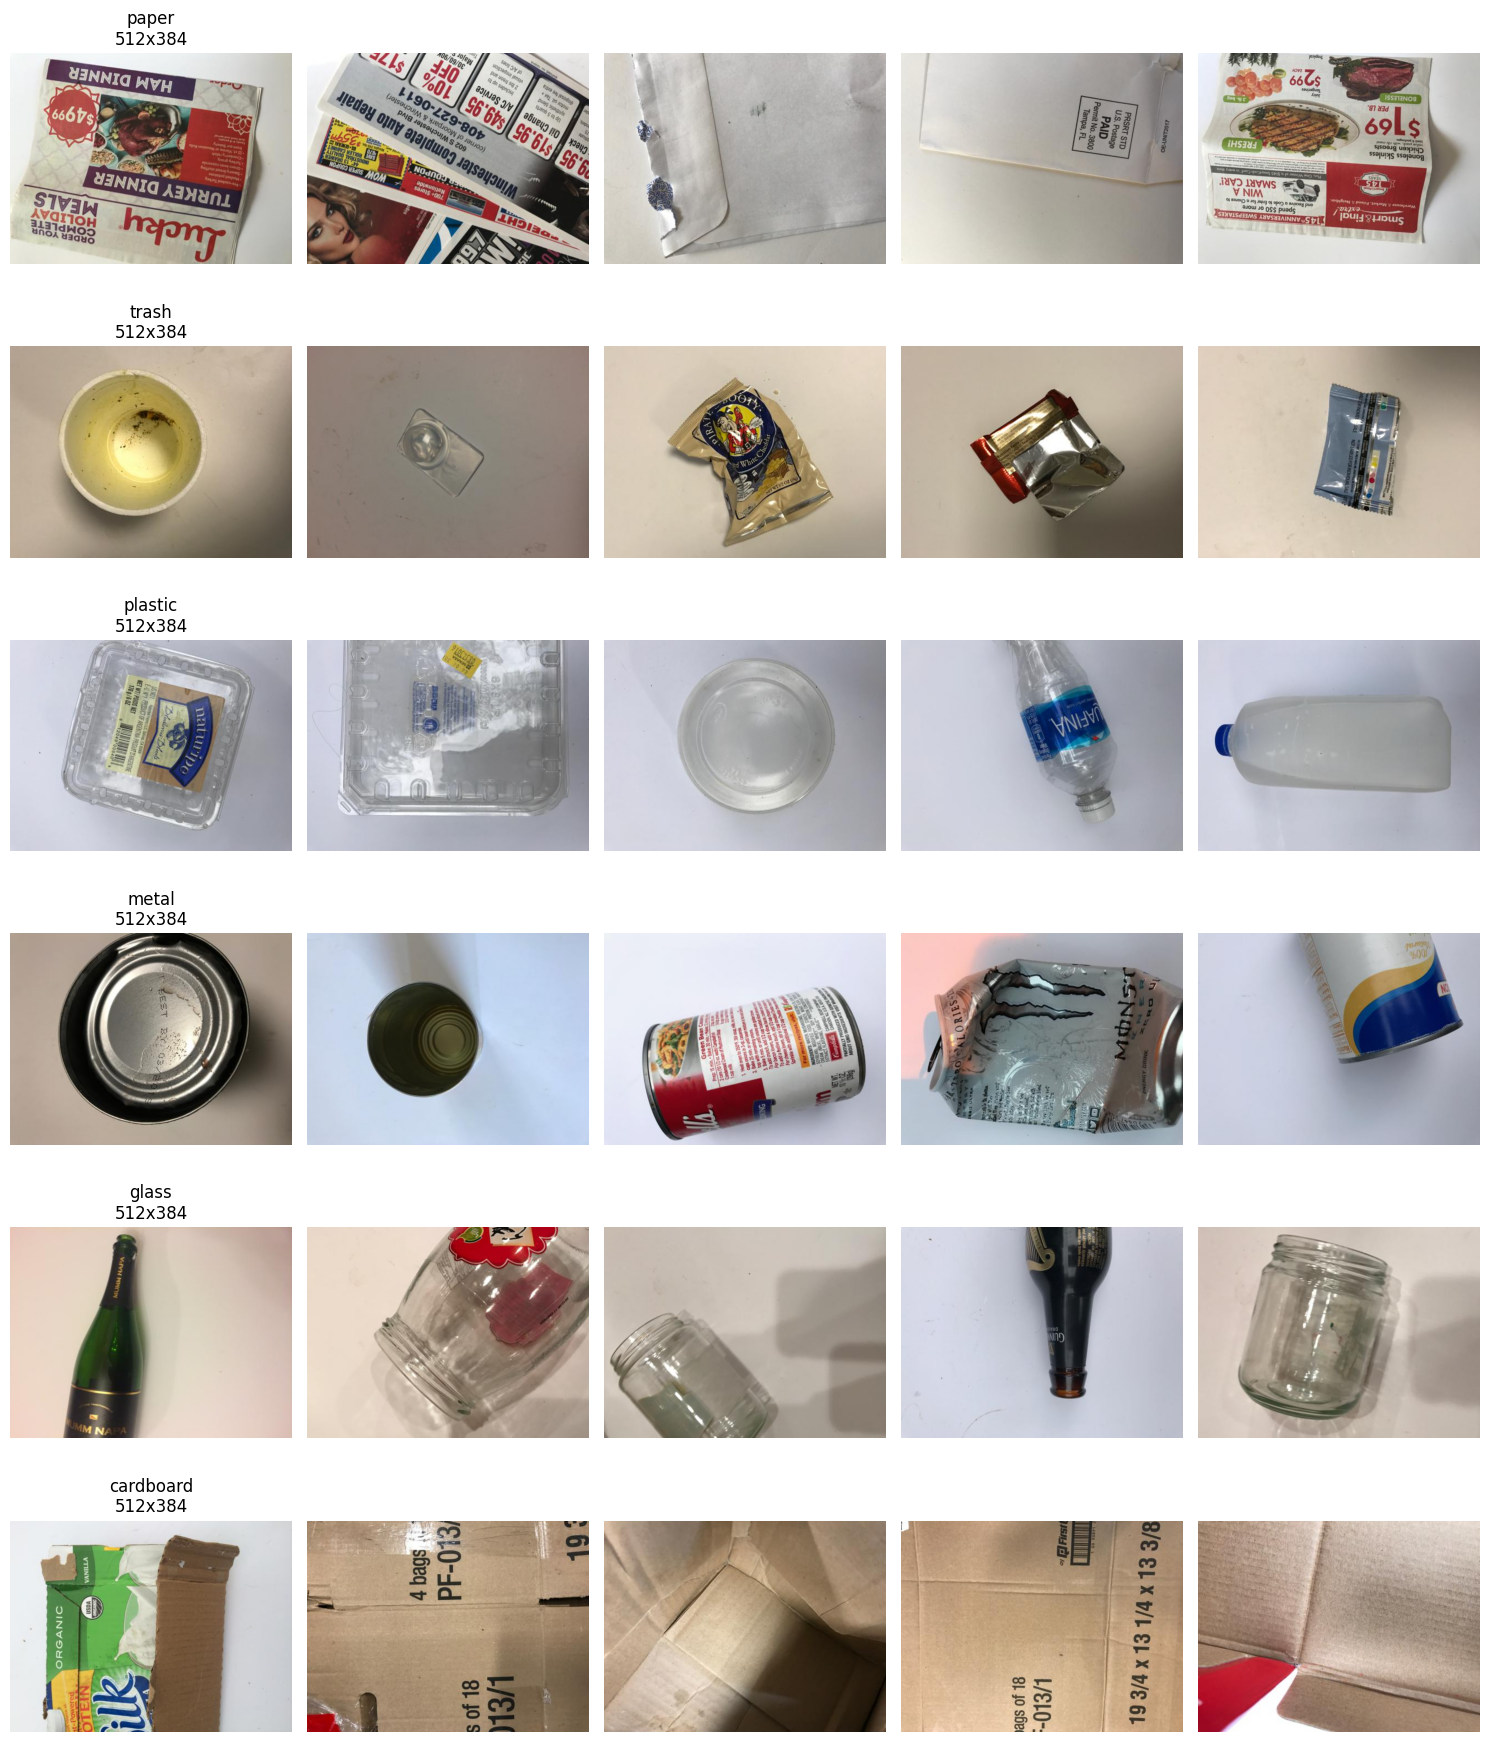

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# ======================
# 1. Verifikasi Path Dataset
# ======================
base_path = "garbage classification/Garbage classification/"
if not os.path.exists(base_path):
    raise FileNotFoundError(f"Path dataset tidak ditemukan: {base_path}")

# ======================
# 2. Membuat Daftar Kelas
# ======================
classes = [cls for cls in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, cls))]

if len(classes) == 0:
    raise ValueError("Tidak ada kelas yang ditemukan di dataset. Periksa struktur folder!")

print(f"Ditemukan {len(classes)} kelas:")
print('\n'.join(classes))

# ======================
# 3. Membuat Kamus Gambar
# ======================
class_images = {}
for cls in classes:
    class_dir = os.path.join(base_path, cls)
    images = [img for img in os.listdir(class_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    class_images[cls] = images

    # Debug: Tampilkan 5 gambar pertama
    print(f"{cls}: {len(images)} gambar")
    if len(images) > 0:
        print(f"Contoh file: {images[:5]}")
    else:
        print(f"⚠️ Peringatan: Folder {cls} kosong!")

# ======================
# 4. Plot Gambar dengan Benar
# ======================
num_classes = len(classes)
num_samples = 5

fig, axs = plt.subplots(num_classes, num_samples, figsize=(15, num_classes*3))

# Jika hanya 1 kelas
if num_classes == 1:
    axs = np.expand_dims(axs, axis=0)

for row, cls in enumerate(classes):
    images = class_images.get(cls, [])
    if len(images) == 0:
        continue

    # Ambil sampel acak
    sample_images = np.random.choice(images, min(num_samples, len(images)), replace=False)

    for col, img_name in enumerate(sample_images):
        img_path = os.path.join(base_path, cls, img_name)
        try:
            img = Image.open(img_path).convert("RGB")  # Gunakan RGB untuk warna
            axs[row, col].imshow(img)
            axs[row, col].axis('off')
            if col == 0:
                axs[row, col].set_title(f"{cls}\n{img.size[0]}x{img.size[1]}")
        except Exception as e:
            print(f"Gagal memuat {img_path}: {str(e)}")
            axs[row, col].axis('off')
            axs[row, col].text(0.5, 0.5, 'Gambar\nRusak', ha='center')

plt.tight_layout()
plt.show()

## Check Dsitribution

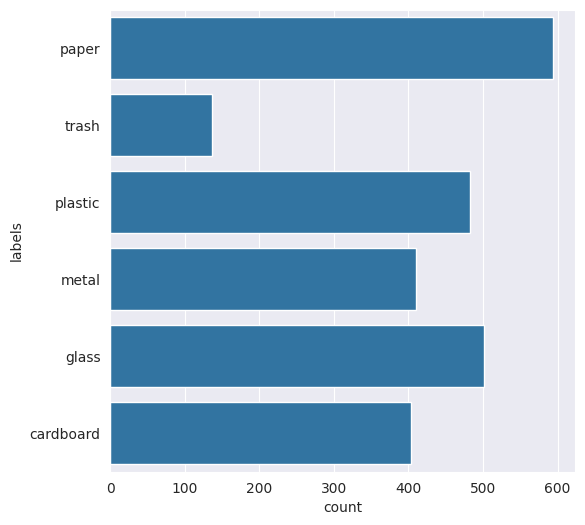

In [ ]:
# Definisikan path sumber
lung_path = "garbage classification/Garbage classification/"

# Buat daftar yang menyimpan data untuk setiap nama file, path file, dan label dalam data
file_name = []
labels = []
full_path = []

# Dapatkan nama file gambar, path file, dan label satu per satu dengan looping, dan simpan sebagai dataframe
for path, subdirs, files in os.walk(lung_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

distribution_train = pd.DataFrame({"path":full_path, 'file_name':file_name, "labels":labels})

# Plot distribusi gambar di setiap kelas
Label = distribution_train['labels']
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

## Data Augmentation

In [ ]:
# Membuat fungsi untuk melakukan rotasi berlawanan arah jarum jam
def anticlockwise_rotation(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224,224))
    sudut = random.randint(0,180)
    return rotate(img, sudut)

# Membuat fungsi untuk melakukan rotasi searah jarum jam
def clockwise_rotation(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224,224))
    sudut = random.randint(0,180)
    return rotate(img, -sudut)

# Membuat fungsi untuk membalik gambar secara vertikal dari atas ke bawah
def flip_up_down(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224,224))
    return np.flipud(img)

# Membuat fungsi untuk memberikan efek peningkatan kecerahan pada gambar
def add_brightness(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224,224))
    img = adjust_gamma(img, gamma=0.5,gain=1)
    return img

# Membuat fungsi untuk memberikan efek blur pada gambar
def blur_image(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224,224))
    return cv2.GaussianBlur(img, (9,9),0)

# Membuat fungsi untuk memberikan efek pergeseran acak pada gambar
def sheared(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224,224))
    transform = AffineTransform(shear=0.2)
    shear_image = warp(img, transform, mode="wrap")
    return shear_image

# Membuat fungsi untuk melakukan pergeseran melengkung pada gambar
def warp_shift(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224,224))
    transform = AffineTransform(translation=(0,40))
    warp_image = warp(img, transform, mode="wrap")
    return warp_image

In [ ]:
# # prompt: buat code menghapus direktori /content/garbage classification/Garbage classification/NORMAL_augmented

# import os, shutil
# # ... (rest of your code)

# # Delete the directory if it exists
# dir_to_delete = "saved_model"
# if os.path.exists(dir_to_delete):
#     shutil.rmtree(dir_to_delete)
#     print(f"Directory '{dir_to_delete}' deleted successfully.")
# else:
#     print(f"Directory '{dir_to_delete}' does not exist.")


Directory 'saved_model' deleted successfully.


In [ ]:
import os
import cv2
import random
import numpy as np
from PIL import Image
from skimage.transform import rotate, AffineTransform, warp
from skimage.exposure import adjust_gamma

def apply_augmentations(class_dir, num_needed):
    image_files = [f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    generated = 0

    while generated < num_needed:
        for img_file in image_files:
            if generated >= num_needed:
                break

            try:
                # Load gambar asli
                img_path = os.path.join(class_dir, img_file)
                img = Image.open(img_path).convert('RGB')
                img_array = np.array(img)

                # Pilih augmentasi secara acak
                augmentation = random.choice([
                    'rotate',
                    'flip',
                    'brightness',
                    'blur',
                    'warp'
                ])

                # Terapkan augmentasi
                if augmentation == 'rotate':
                    angle = random.choice([90, 180, 270])
                    augmented = img.rotate(angle)
                elif augmentation == 'flip':
                    augmented = img.transpose(Image.FLIP_LEFT_RIGHT)
                elif augmentation == 'brightness':
                    arr = adjust_gamma(img_array, gamma=random.uniform(0.7, 1.3))
                    augmented = Image.fromarray(arr)
                elif augmentation == 'blur':
                    arr = cv2.GaussianBlur(img_array, (5,5), 0)
                    augmented = Image.fromarray(arr)
                elif augmentation == 'warp':
                    transform = AffineTransform(translation=(random.randint(-20,20), random.randint(-20,20)))
                    arr = warp(img_array, transform, mode='edge')
                    augmented = Image.fromarray((arr * 255).astype(np.uint8))

                # Simpan gambar hasil augmentasi
                new_name = f"aug_{generated}_{img_file}"
                augmented.save(os.path.join(class_dir, new_name))
                generated += 1

            except Exception as e:
                print(f"Gagal memproses {img_file}: {str(e)}")

# Hitung distribusi kelas
base_dir = "garbage classification/Garbage classification/"
classes = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
class_counts = {cls: len(os.listdir(os.path.join(base_dir, cls))) for cls in classes}

# Tentukan jumlah augmentasi yang diinginkan per kelas
augmentation_per_class = 1000  # Misalnya, tambahkan 1000 gambar augmentasi per kelas

# Terapkan augmentasi untuk setiap kelas
for cls in classes:
    cls_dir = os.path.join(base_dir, cls)
    print(f"Menambahkan {augmentation_per_class} augmentasi untuk kelas {cls}")
    apply_augmentations(cls_dir, augmentation_per_class)

print("Augmentasi selesai!")

Menambahkan 1000 augmentasi untuk kelas paper
Menambahkan 1000 augmentasi untuk kelas trash
Menambahkan 1000 augmentasi untuk kelas plastic
Menambahkan 1000 augmentasi untuk kelas metal
Menambahkan 1000 augmentasi untuk kelas glass
Menambahkan 1000 augmentasi untuk kelas cardboard
Augmentasi selesai!


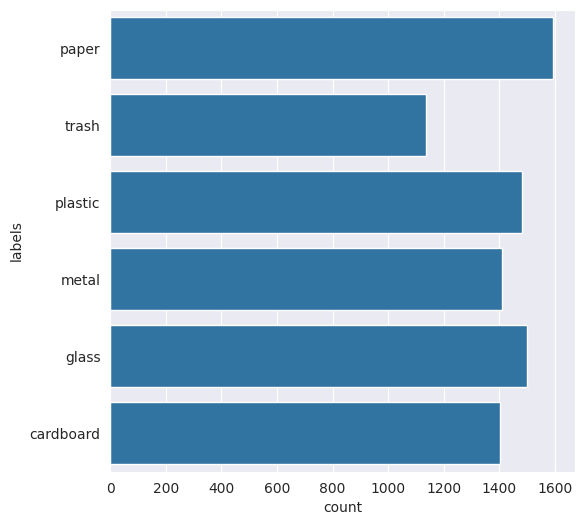

In [ ]:
# Definisikan path sumber
lung_path = "garbage classification/Garbage classification/"

# Buat daftar yang menyimpan data untuk setiap nama file, path file, dan label dalam data
file_name = []
labels = []
full_path = []

# Dapatkan nama file gambar, path file, dan label satu per satu dengan looping, dan simpan sebagai dataframe
for path, subdirs, files in os.walk(lung_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

distribution_train = pd.DataFrame({"path":full_path, 'file_name':file_name, "labels":labels})

# Plot distribusi gambar di setiap kelas
Label = distribution_train['labels']
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

### Splitting Data

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ====================================================
# KRITERIA 3: PEMBAGIAN DATASET
# ====================================================
# Path ke dataset yang sudah di-augmentasi
dataset_path = "garbage classification/Garbage classification/"

# Parameter
img_size = (224, 224)  # Ukuran gambar yang akan digunakan
batch_size = 32
validation_split = 0.15  # 15% untuk validasi
test_split = 0.15       # 15% untuk test
seed = 42               # Random seed untuk reproduktibilitas

# Preprocessing dan pembagian dataset
datagen = ImageDataGenerator(
    rescale=1./255,     # Normalisasi pixel [0,1]
    validation_split=validation_split + test_split
)

# Membuat generator untuk train, validation, dan test
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=seed
)

# Split sisa data menjadi validation dan test
remaining_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    seed=seed
)

# Hitung jumlah data untuk validation dan test
total_remaining = remaining_generator.samples
test_size = int(total_remaining * test_split / (validation_split + test_split))

# Split manual
validation_data = []
test_data = []

for _ in range(int(total_remaining/batch_size)+1):
    batch = next(remaining_generator)
    if len(test_data)*batch_size < test_size:
        test_data.append(batch)
    else:
        validation_data.append(batch)

# Gabungkan batch
validation_images = np.concatenate([b[0] for b in validation_data])
validation_labels = np.concatenate([b[1] for b in validation_data])
test_images = np.concatenate([b[0] for b in test_data])
test_labels = np.concatenate([b[1] for b in test_data])

Found 5971 images belonging to 6 classes.
Found 2556 images belonging to 6 classes.


### Konsistensi Generator

In [ ]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ====================================================
# 1. MEMBUAT STRUKTUR DIREKTORI YANG KONSISTEN
# ====================================================
def create_directory_structure(base_dir):
    # Daftar direktori yang diperlukan
    dirs = ['train', 'val', 'test']
    classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

    # Buat folder untuk setiap subset data
    for dir_name in dirs:
        dir_path = os.path.join(base_dir, dir_name)
        os.makedirs(dir_path, exist_ok=True)

        # Buat folder kelas di setiap subset
        for cls in classes:
            cls_path = os.path.join(dir_path, cls)
            os.makedirs(cls_path, exist_ok=True)

# ====================================================
# 2. MEMISAHKAN DATA DENGAN STRATIFIED SPLIT
# ====================================================
def split_dataset(source_dir, base_dir, test_size=0.15, val_size=0.15):
    classes = os.listdir(source_dir)

    for cls in classes:
        # Path sumber dan tujuan
        src_cls_dir = os.path.join(source_dir, cls)
        all_images = [f for f in os.listdir(src_cls_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Split data: train 70%, temp 30%
        train_files, temp_files = train_test_split(
            all_images,
            test_size=test_size + val_size,
            random_state=42,
            stratify=None  # Untuk dataset seimbang
        )

        # Split temp menjadi val dan test
        val_files, test_files = train_test_split(
            temp_files,
            test_size=test_size/(test_size + val_size),
            random_state=42
        )

        # Salin file ke direktori yang sesuai
        def copy_files(files, subset):
            dest_dir = os.path.join(base_dir, subset, cls)
            for f in files:
                src = os.path.join(src_cls_dir, f)
                dst = os.path.join(dest_dir, f)
                shutil.copyfile(src, dst)

        copy_files(train_files, 'train')
        copy_files(val_files, 'val')
        copy_files(test_files, 'test')

# ====================================================
# 3. MEMBUAT GENERATOR YANG KONSISTEN
# ====================================================
def create_consistent_generators(base_dir, img_size=(224,224), batch_size=32):
    # Preprocessing yang sama untuk semua subset
    datagen = ImageDataGenerator(rescale=1./255)

    # Generator untuk training
    train_generator = datagen.flow_from_directory(
        os.path.join(base_dir, 'train'),
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True
    )

    # Simpan class indices
    class_indices = train_generator.class_indices

    # Fungsi pembuat generator
    def create_subset_generator(subset):
        return datagen.flow_from_directory(
            os.path.join(base_dir, subset),
            target_size=img_size,
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=False,
            classes=list(class_indices.keys()))

    # Buat generator untuk validasi dan test
    val_generator = create_subset_generator('val')
    test_generator = create_subset_generator('test')

    # Validasi konsistensi
    assert train_generator.class_indices == val_generator.class_indices
    assert train_generator.class_indices == test_generator.class_indices

    return train_generator, val_generator, test_generator

# ====================================================
# EKSEKUSI UTAMA
# ====================================================
# Parameter
source_dir = "garbage classification/Garbage classification"
base_dir = "garbage_classification/dataset_structured"

# 1. Buat struktur direktori
create_directory_structure(base_dir)

# 2. Split dataset
split_dataset(source_dir, base_dir)

# 3. Buat generator yang konsisten
train_gen, val_gen, test_gen = create_consistent_generators(base_dir)

# 4. Validasi akhir
print("\nValidasi Konsistensi:")
print(f"Train classes: {train_gen.class_indices}")
print(f"Val classes: {val_gen.class_indices}")
print(f"Test classes: {test_gen.class_indices}")

print("\nValidasi Shape:")
print(f"Train image shape: {train_gen.image_shape}")
print(f"Val image shape: {val_gen.image_shape}")
print(f"Test image shape: {test_gen.image_shape}")

print("\nValidasi Label Encoding:")
print(f"Contoh label train: {train_gen[0][1][0]}")
print(f"Contoh label val: {val_gen[0][1][0]}")
print(f"Contoh label test: {test_gen[0][1][0]}")

Found 5966 images belonging to 6 classes.
Found 1278 images belonging to 6 classes.
Found 1283 images belonging to 6 classes.

Validasi Konsistensi:
Train classes: {'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}
Val classes: {'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}
Test classes: {'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

Validasi Shape:
Train image shape: (224, 224, 3)
Val image shape: (224, 224, 3)
Test image shape: (224, 224, 3)

Validasi Label Encoding:
Contoh label train: [1. 0. 0. 0. 0. 0.]
Contoh label val: [1. 0. 0. 0. 0. 0.]
Contoh label test: [1. 0. 0. 0. 0. 0.]


### Build Model

#### CallBack


In [ ]:
from tensorflow.keras.callbacks import Callback

# ====================================================
# CUSTOM CALLBACK UNTUK AKURASI 95%
# ====================================================
class HighAccuracyCallback(Callback):
    def __init__(self):
        super(HighAccuracyCallback, self).__init__()
        self.stopped_epoch = 0

    def on_epoch_end(self, epoch, logs=None):
        current_acc = logs.get('accuracy')
        current_val_acc = logs.get('val_accuracy')

        # Berhenti training jika kedua akurasi > 95%
        if current_acc >= 0.95 and current_val_acc >= 0.95:
            self.stopped_epoch = epoch
            self.model.stop_training = True
            print(f"\nTraining dihentikan di epoch {epoch+1}: Akurasi Training {current_acc*100:.2f}%, Akurasi Validasi {current_val_acc*100:.2f}%")


#### Model

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def create_optimized_model_v2(input_shape=(128,128,3), num_classes=6):
    model = Sequential([
        # Block 1 (Downsized filters)
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(2,2),

        # Block 2
        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),

        # Block 3 (Simplified architecture)
        Conv2D(128, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),

         # Block 4 (Simplified architecture)
        Conv2D(256, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),

        # Final Block (Removed 4th conv block)
        Flatten(),

        # Simplified dense layers
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),

        Dropout(0.5),
        Dense(128, activation='relu'),
        BatchNormalization(),

        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
# ====================================================
# PELATIHAN DENGAN GENERATOR YANG KONSISTEN (OPTIMIZED)
# ====================================================
# Parameter training
input_shape = (224, 224, 3)
batch_size = 32
epochs = 25  # Tingkatkan jumlah epoch

# Inisialisasi model
model = create_optimized_model_v2(input_shape, len(train_gen.class_indices))

# Callback
callbacks = [
    HighAccuracyCallback(),
    tf.keras.callbacks.ModelCheckpoint(
        'best_model.h5',
        save_best_only=True,
        monitor='val_accuracy',
        mode='max'
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.5,
        patience=5,  # Tingkatkan patience
        verbose=1,
        min_lr=1e-7
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=15,
        restore_best_weights=True
    )
]

# Hitung steps_per_epoch
steps_per_epoch = np.ceil(train_gen.samples / batch_size).astype(int)

# Training model
history = model.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=val_gen,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4475 - loss: 1.5879

187/187 ━━━━━━━━━━━━━━━━━━━━ 698s 4s/step - accuracy: 0.4478 - loss: 1.5867 - val_accuracy: 0.1729 - val_loss: 2.1722 - learning_rate: 1.0000e-04
Epoch 2/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6757 - loss: 0.9376

187/187 ━━━━━━━━━━━━━━━━━━━━ 751s 4s/step - accuracy: 0.6757 - loss: 0.9375 - val_accuracy: 0.3834 - val_loss: 1.5227 - learning_rate: 1.0000e-04
Epoch 3/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7291 - loss: 0.7412

187/187 ━━━━━━━━━━━━━━━━━━━━ 752s 4s/step - accuracy: 0.7291 - loss: 0.7411 - val_accuracy: 0.7058 - val_loss: 0.8316 - learning_rate: 1.0000e-04
Epoch 4/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7965 - loss: 0.5937

187/187 ━━━━━━━━━━━━━━━━━━━━ 761s 4s/step - accuracy: 0.7966 - loss: 0.5937 - val_accuracy: 0.7308 - val_loss: 0.7258 - learning_rate: 1.0000e-04
Epoch 5/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8420 - loss: 0.4627

187/187 ━━━━━━━━━━━━━━━━━━━━ 795s 4s/step - accuracy: 0.8420 - loss: 0.4628 - val_accuracy: 0.7379 - val_loss: 0.7309 - learning_rate: 1.0000e-04
Epoch 6/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8612 - loss: 0.4079

187/187 ━━━━━━━━━━━━━━━━━━━━ 741s 4s/step - accuracy: 0.8612 - loss: 0.4079 - val_accuracy: 0.8513 - val_loss: 0.4515 - learning_rate: 1.0000e-04
Epoch 7/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8993 - loss: 0.3166

187/187 ━━━━━━━━━━━━━━━━━━━━ 763s 4s/step - accuracy: 0.8993 - loss: 0.3167 - val_accuracy: 0.8725 - val_loss: 0.3918 - learning_rate: 1.0000e-04
Epoch 8/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 748s 4s/step - accuracy: 0.9040 - loss: 0.2937 - val_accuracy: 0.8451 - val_loss: 0.4501 - learning_rate: 1.0000e-04
Epoch 9/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 746s 4s/step - accuracy: 0.9240 - loss: 0.2422 - val_accuracy: 0.6800 - val_loss: 0.9870 - learning_rate: 1.0000e-04
Epoch 10/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9372 - loss: 0.2005

187/187 ━━━━━━━━━━━━━━━━━━━━ 748s 4s/step - accuracy: 0.9371 - loss: 0.2005 - val_accuracy: 0.8944 - val_loss: 0.3423 - learning_rate: 1.0000e-04
Epoch 11/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 731s 4s/step - accuracy: 0.9501 - loss: 0.1584 - val_accuracy: 0.8130 - val_loss: 0.5611 - learning_rate: 1.0000e-04
Epoch 12/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 745s 4s/step - accuracy: 0.9472 - loss: 0.1684 - val_accuracy: 0.8779 - val_loss: 0.3526 - learning_rate: 1.0000e-04
Epoch 13/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 818s 4s/step - accuracy: 0.9609 - loss: 0.1372 - val_accuracy: 0.8693 - val_loss: 0.4080 - learning_rate: 1.0000e-04
Epoch 14/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 807s 4s/step - accuracy: 0.9603 - loss: 0.1281 - val_accuracy: 0.8889 - val_loss: 0.3612 - learning_rate: 1.0000e-04
Epoch 15/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9713 - loss: 0.1091
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
187/187 ━━━━━━━━━━━━━━━━━━━━ 816s 4s/step - accuracy: 0.971

187/187 ━━━━━━━━━━━━━━━━━━━━ 838s 4s/step - accuracy: 0.9712 - loss: 0.1035 - val_accuracy: 0.9171 - val_loss: 0.2726 - learning_rate: 5.0000e-05
Epoch 17/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 774s 4s/step - accuracy: 0.9801 - loss: 0.0727 - val_accuracy: 0.9108 - val_loss: 0.2740 - learning_rate: 5.0000e-05
Epoch 18/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9843 - loss: 0.0681

187/187 ━━━━━━━━━━━━━━━━━━━━ 775s 4s/step - accuracy: 0.9843 - loss: 0.0680 - val_accuracy: 0.9233 - val_loss: 0.2646 - learning_rate: 5.0000e-05
Epoch 19/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 821s 4s/step - accuracy: 0.9881 - loss: 0.0501 - val_accuracy: 0.9218 - val_loss: 0.2653 - learning_rate: 5.0000e-05
Epoch 20/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 787s 4s/step - accuracy: 0.9894 - loss: 0.0487 - val_accuracy: 0.9218 - val_loss: 0.2654 - learning_rate: 5.0000e-05
Epoch 21/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 815s 4s/step - accuracy: 0.9871 - loss: 0.0523 - val_accuracy: 0.9108 - val_loss: 0.2911 - learning_rate: 5.0000e-05
Epoch 22/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 789s 4s/step - accuracy: 0.9872 - loss: 0.0468 - val_accuracy: 0.9108 - val_loss: 0.2785 - learning_rate: 5.0000e-05
Epoch 23/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9898 - loss: 0.0433
Epoch 23: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
187/187 ━━━━━━━━━━━━━━━━━━━━ 801s 4s/step - accuracy: 0.989

187/187 ━━━━━━━━━━━━━━━━━━━━ 770s 4s/step - accuracy: 0.9918 - loss: 0.0348 - val_accuracy: 0.9264 - val_loss: 0.2738 - learning_rate: 2.5000e-05


### EVALUASI AKURASI TRAINING DAN TESTING




In [42]:
# Evaluasi akurasi training
train_results = model.evaluate(
    train_gen,
    steps=np.ceil(train_gen.samples / batch_size).astype(int),
    verbose=0
)
print(f"Akurasi Training: {train_results[1]:.4f}")

# Evaluasi akurasi testing
test_results = model.evaluate(
    test_gen,
    steps=np.ceil(val_gen.samples / batch_size).astype(int),
    verbose=0
)
print(f"Akurasi Testing: {test_results[1]:.4f}")

Akurasi Training: 0.9997


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Akurasi Testing: 0.9266


### VISUALISASI AKURASI DAN LOSS


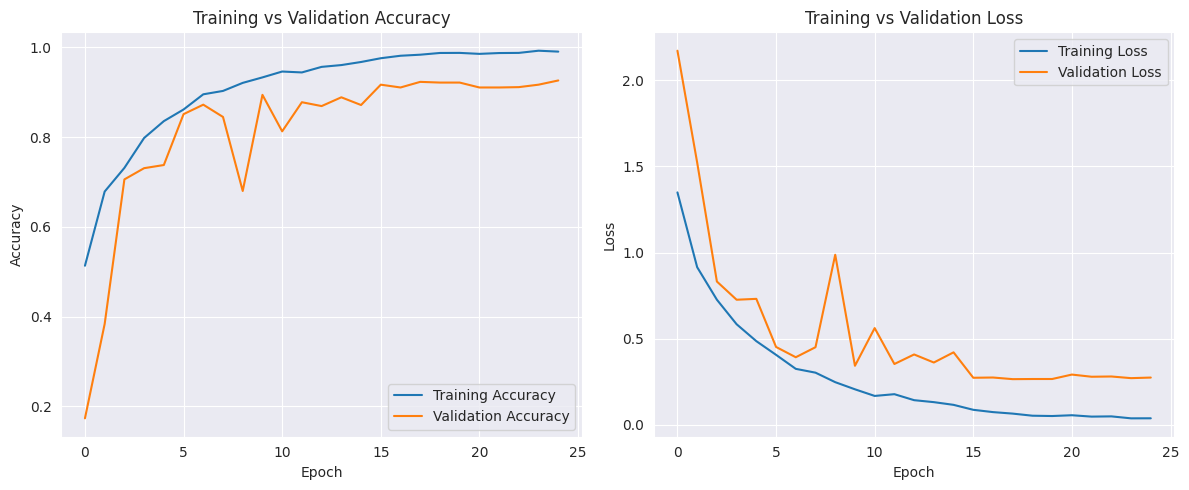

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#### Save Model

In [ ]:
save_path = 'mymodel/'
tf.saved_model.save(model, save_path)

### TF-Lite

In [ ]:
# Konversi ke TF-Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Optimasi ukuran model
tflite_model = converter.convert()

# Simpan model
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpxtxphbod'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_21')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  134144485783696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134144485780240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134144485780048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134144485782160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134144485783888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134144485782544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134144485779088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134144485779664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134144485779856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134144485778896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13414448578

### TFJS

In [ ]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 23.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2


In [ ]:
# Konversi ke format TFJS
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, "tfjs_model")

failed to lookup keras version from the file,
    this is likely a weight only file


## Inference

inference with tflite and cardboard example

In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Load model
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Get input details
input_details = interpreter.get_input_details()
input_shape = input_details[0]['shape']

# Preprocess image
def preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')
    img = img.resize((input_shape[1], input_shape[2]))  # Sesuaikan dengan input model
    img_array = np.array(img, dtype=np.float32)
    img_array = img_array / 255.0  # Normalisasi
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Contoh penggunaan
sample_image = preprocess_image("test.jpg")

# Inference
interpreter.set_tensor(input_details[0]['index'], sample_image)
interpreter.invoke()

# Get output
output_details = interpreter.get_output_details()
predictions = interpreter.get_tensor(output_details[0]['index'])

# Decode predictions
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic']  # Sesuaikan
predicted_class = class_names[np.argmax(predictions)]
confidence = np.max(predictions) * 100

print(f"Prediksi: {predicted_class} ({confidence:.2f}%)")

Prediksi: cardboard (99.99%)


---

download command

In [ ]:
# # prompt: buat kode untuk download repositori saved_model

# !zip -r tfjs_model.zip tfjs_model/
# from google.colab import files
# files.download('tfjs_model.zip')

  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/model.json (deflated 91%)
  adding: tfjs_model/group1-shard2of10.bin (deflated 7%)
  adding: tfjs_model/group1-shard10of10.bin (deflated 7%)
  adding: tfjs_model/group1-shard7of10.bin (deflated 7%)
  adding: tfjs_model/group1-shard3of10.bin (deflated 7%)
  adding: tfjs_model/group1-shard1of10.bin (deflated 7%)
  adding: tfjs_model/group1-shard4of10.bin (deflated 7%)
  adding: tfjs_model/group1-shard9of10.bin (deflated 7%)
  adding: tfjs_model/group1-shard8of10.bin (deflated 7%)
  adding: tfjs_model/group1-shard6of10.bin (deflated 7%)
  adding: tfjs_model/group1-shard5of10.bin (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')